In [1]:
# load all the libraries ...
import tensorflow as tf
import keras as k
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import time
import seaborn as sns

Using TensorFlow backend.


In [2]:
# load the data file ...
filename = r'/home/anurag/Downloads/res.xlsx'
DataFrame = pd.read_excel(filename)
DataFrame.columns = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation',
                     'Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']
# Make the input and target file ...
X = DataFrame.iloc[:,:8] # input dataset
y = DataFrame.iloc[:,8:] # target

# convert DataFrames to values 
X = X.values
y = y.values

Feature ranking:
1. feature 4 (0.593496), id: 'Relative Compactness'
2. feature 3 (0.168577), id: 'Surface Area'
3. feature 6 (0.066645), id: 'Wall Area'
4. feature 1 (0.053390), id: 'Roof Area'
5. feature 0 (0.051692), id: 'Overall Height'
6. feature 2 (0.049061), id: 'Orientation'
7. feature 7 (0.011563), id: 'Glazing Area'
8. feature 5 (0.005576), id: 'Glazing Area Distribution'


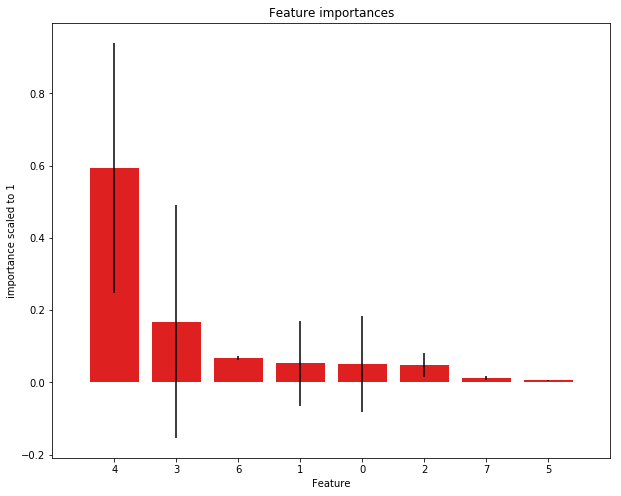

In [4]:
forest = ExtraTreesRegressor(n_estimators=2500,
                              random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f), id: '%s'" % (f + 1, indices[f], importances[indices[f]], DataFrame.columns[f]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature importances")
sns.barplot(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Feature')
plt.ylabel('importance scaled to 1')
plt.xlim([-1, X.shape[1]])
plt.show()

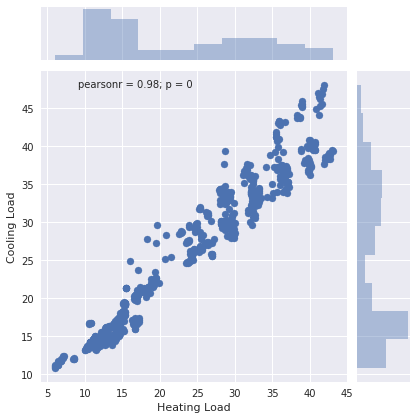

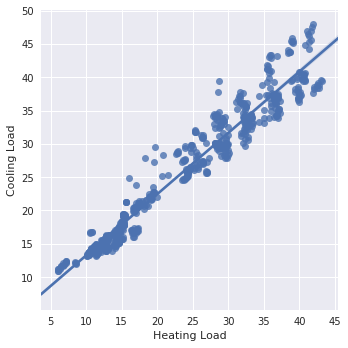

In [4]:
# relation between cooling and heating load 
sns.set(color_codes=True)
plt.figure(figsize=(15,15))
sns.jointplot(x="Heating Load", y="Cooling Load", data=DataFrame)
sns.lmplot(x="Heating Load", y="Cooling Load", data =DataFrame, palette="Set1")
plt.show()

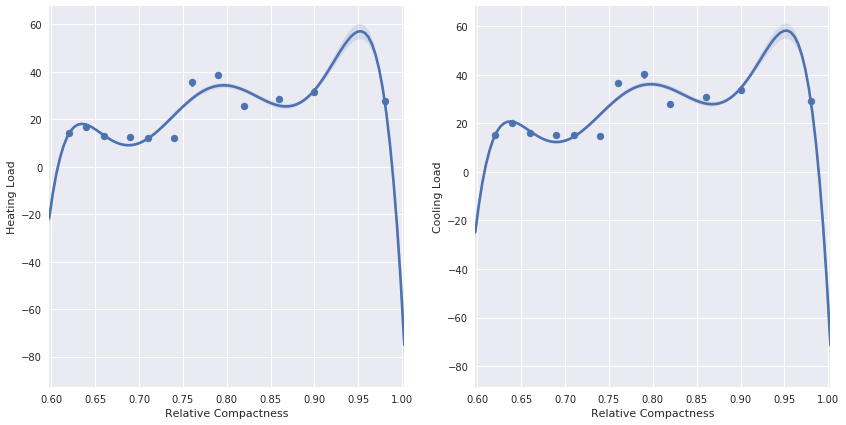

In [5]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.regplot(x="Relative Compactness", y="Heating Load", data=DataFrame, x_estimator=np.mean, order=6)
plt.subplot(1,2,2)
sns.regplot(x="Relative Compactness", y="Cooling Load", data=DataFrame, x_estimator=np.mean, order=6)
plt.show()

In [6]:
# Now we develop the basic model suing keras framework ...

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(2, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [7]:
# Implementing wide neural network
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: 3.16 (3.43) MSE


In [1]:
1

1